# Scenario
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. To determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

## Goal
Evaluate A/B testing results and decide which marketing strategy works the best.

## Columns
- **MarketID**: Unique identifier for market.
- **MarketSize**: Size of market area by sales.
- **LocationID**: Unique identifier for store location.
- **AgeOfStore**: Age of store in years.
- **Promotion**: One of three promotions that were tested.
- **Week**: One of four weeks when the promotions were run.
- **SalesInThousands**: Sales amount (in thousands) for a specific `LocationID`, `Promotion`, and `Week`.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('WA_Marketing-Campaign.csv')
data.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [7]:
# Convert column 'LocationID' to object type
# Convert specified columns to object type
data[['LocationID', 'Promotion', 'week']] = data[['LocationID', 'Promotion', 'week']].astype(object)

# Verify the changes
print(data.dtypes)

MarketID              int64
MarketSize           object
LocationID           object
AgeOfStore            int64
Promotion            object
week                 object
SalesInThousands    float64
dtype: object


In [8]:
print(data.MarketSize.value_counts())

MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64


In [10]:
print(data.LocationID.value_counts())

LocationID
1      4
615    4
609    4
610    4
611    4
      ..
222    4
221    4
220    4
219    4
920    4
Name: count, Length: 137, dtype: int64


In [34]:
print(data.Promotion.value_counts())

Promotion
3    188
2    188
1    172
Name: count, dtype: int64


In [11]:
print(data.week.value_counts())

week
1    137
2    137
3    137
4    137
Name: count, dtype: int64


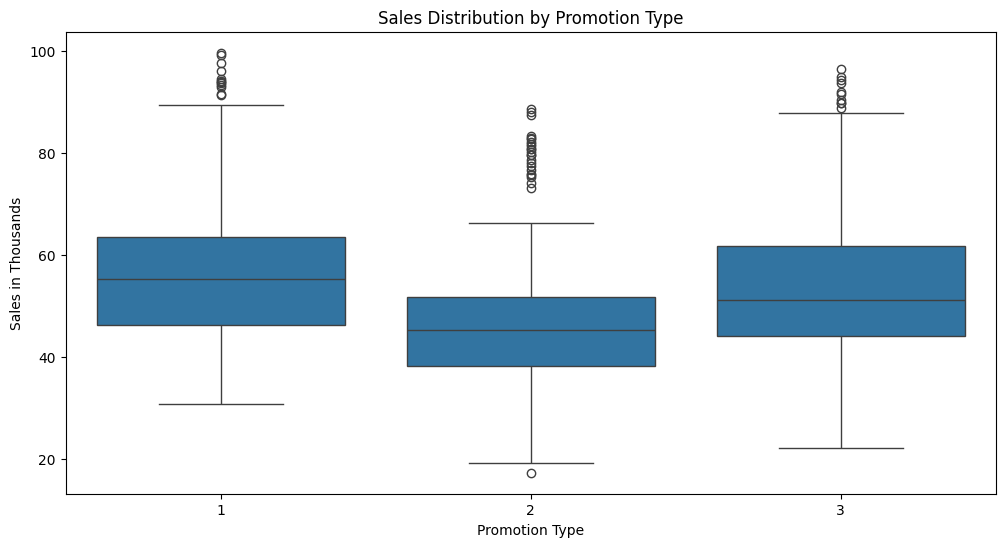

In [14]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=data)
plt.title('Sales Distribution by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Sales in Thousands')
plt.show()

In [42]:
# Summary statistics
promotion_summary = data.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count'])
print("\nPromotion Summary Statistics:")
print(promotion_summary)


Promotion Summary Statistics:
                mean        std  count
Promotion                             
1          58.099012  16.553782    172
2          47.329415  15.108955    188
3          55.364468  16.766231    188


In [33]:
# Filter the DataFrame where Promotion is 1 and select columns 'Promotion', 'Week', and 'SalesInThousands'
data[data['Promotion'] == 1][['Promotion', 'week', 'SalesInThousands']]


,Promotion,week,SalesInThousands
8,1,1,44.54
9,1,2,37.94
10,1,3,45.49
11,1,4,34.75
24,1,1,42.92
...,...,...,...
539,1,4,61.63
540,1,1,59.87
541,1,2,62.99
542,1,3,57.20


In [35]:
data[data['Promotion'] == 2][['Promotion', 'week', 'SalesInThousands']]

,Promotion,week,SalesInThousands
4,2,1,27.81
5,2,2,34.67
6,2,3,27.98
7,2,4,27.72
12,2,1,39.28
...,...,...,...
531,2,4,49.71
544,2,1,50.20
545,2,2,45.75
546,2,3,44.29


In [84]:
data.groupby('Promotion').count()

AttributeError: 'dict' object has no attribute 'groupby'

In [36]:
data[data['Promotion'] == 3][['Promotion', 'week', 'SalesInThousands']]

,Promotion,week,SalesInThousands
0,3,1,33.73
1,3,2,35.67
2,3,3,29.03
3,3,4,39.25
20,3,1,32.90
...,...,...,...
487,3,4,58.33
532,3,1,53.50
533,3,2,56.34
534,3,3,51.83


In [43]:
data.groupby('Promotion')['SalesInThousands'].sum()

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64


Bayesian Thompson Sampling (Gaussian) Results for ARPP Optimization
----------------------------------------------------------------------
Strategy Strategy_1 (Promotion 1):
- No. of Promotions: 172
- Total Revenue: $9993.03
- Observed ARPP: $58.10
- Posterior Mean ARPP: $55.62, Std Dev: $2.97

Strategy Strategy_2 (Promotion 2):
- No. of Promotions: 188
- Total Revenue: $8897.93
- Observed ARPP: $47.33
- Posterior Mean ARPP: $50.01, Std Dev: $2.61

Strategy Strategy_3 (Promotion 3):
- No. of Promotions: 188
- Total Revenue: $10408.52
- Observed ARPP: $55.36
- Posterior Mean ARPP: $54.47, Std Dev: $2.84

Bayesian Analysis:
Probability that Promotion 1 is better than Promotion 2: 91.6%
Probability that Promotion 1 is better than Promotion 3: 58.8%
Expected relative lift (1 vs 2): 11.3%
Expected relative lift (1 vs 3): 2.3%
95% Credible Interval for 1 vs 2 Difference: [-5.49%, 28.67%]
95% Credible Interval for 1 vs 3 Difference: [-11.74%, 17.73%]


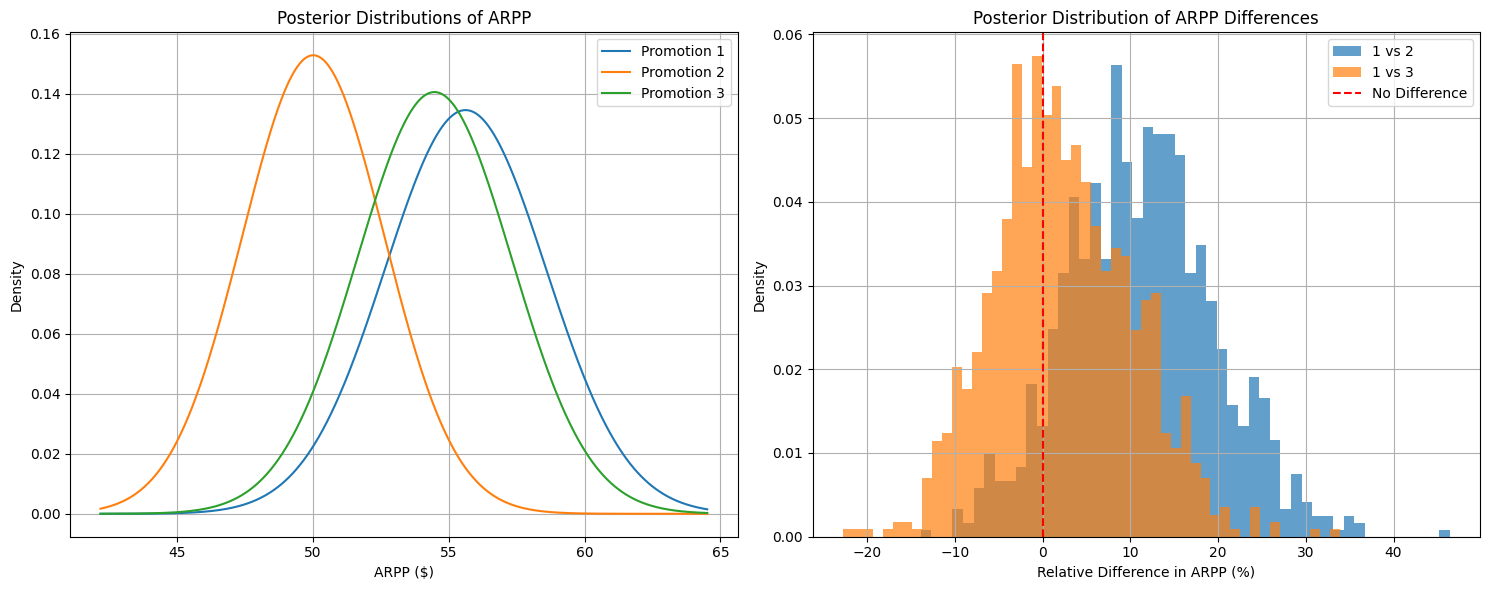

In [88]:
# Data
# Information about strategies: frequency of promotion and sales revenue
# 'name' provides a label for better visualization
#  Testing three different recommendation strategies
# Strategy 1: promotion idea 1
# Strategy 2: promotion idea 2
# Strategy 3: promotion idea 3
# no_of_times: total no of times of promotion for  4 weeks across each location 

# Import necessary libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Data
# Information about strategies: frequency of promotion and sales revenue
# 'name' provides a label for better visualization
data = {
    'Strategy_1': {'no_of_times': 172, 'sales_revenue': 9993.03, 'name': 'Promotion 1'},
    'Strategy_2': {'no_of_times': 188, 'sales_revenue': 8897.93, 'name': 'Promotion 2'},
    'Strategy_3': {'no_of_times': 188, 'sales_revenue': 10408.52, 'name': 'Promotion 3'}
}

# Calculate observed Average Revenue Per Promotion (ARPP) for each strategy per day
arpp = {
    key: data[key]['sales_revenue'] / data[key]['no_of_times'] for key in data
}

# Calculate standard deviations for each strategy
# Assuming revenue per promotion follows a Gaussian distribution
std_devs = {
    key: np.sqrt((arpp[key]) ** 2 / data[key]['no_of_times']) for key in data
}

# Calculate prior mean and standard deviation based on observed ARPPs
prior_mean = np.mean(list(arpp.values()))
prior_std = np.sqrt(np.mean([std ** 2 for std in std_devs.values()]))

# Posterior calculations for Bayesian updating
# Combining prior information with observed data
posterior = {}
for key in data:
    posterior[key] = {
        'mean': (prior_mean / prior_std**2 + arpp[key] / std_devs[key]**2) / (1 / prior_std**2 + 1 / std_devs[key]**2),
        'std': np.sqrt(1 / (1 / prior_std**2 + 1 / std_devs[key]**2))
    }

# Monte Carlo simulation to sample posterior distributions
n_samples = 1000
samples = {key: np.random.normal(posterior[key]['mean'], posterior[key]['std'], n_samples) for key in data}

# Calculate probabilities of one strategy being better than another
prob_Strategy_1_better_Strategy_2 = np.mean(samples['Strategy_1'] > samples['Strategy_2'])
prob_Strategy_1_better_Strategy_3 = np.mean(samples['Strategy_1'] > samples['Strategy_3'])

# Calculate expected relative lift in ARPP between strategies
relative_lift = {
    '1_vs_2': np.mean((samples['Strategy_1'] - samples['Strategy_2']) / samples['Strategy_2'] * 100),
    '1_vs_3': np.mean((samples['Strategy_1'] - samples['Strategy_3']) / samples['Strategy_3'] * 100)
}

# Visualization of the posterior distributions and differences
plt.figure(figsize=(15, 6))

# Plot 1: Posterior distributions for ARPP
x_min = min(posterior[key]['mean'] - 3 * posterior[key]['std'] for key in posterior)
x_max = max(posterior[key]['mean'] + 3 * posterior[key]['std'] for key in posterior)
x = np.linspace(x_min, x_max, 1000)

plt.subplot(1, 2, 1)
for key in data:
    plt.plot(x, norm.pdf(x, posterior[key]['mean'], posterior[key]['std']), label=f"{data[key]['name']}")
plt.xlabel("ARPP ($)")
plt.ylabel("Density")
plt.title("Posterior Distributions of ARPP")
plt.legend()
plt.grid(True)

# Plot 2: Differences in ARPP (Relative Lift)
diff_12 = (samples['Strategy_1'] - samples['Strategy_2']) * 100 / samples['Strategy_2']
diff_13 = (samples['Strategy_1'] - samples['Strategy_3']) * 100 / samples['Strategy_3']

plt.subplot(1, 2, 2)
plt.hist(diff_12, bins=50, density=True, alpha=0.7, label="1 vs 2")
plt.hist(diff_13, bins=50, density=True, alpha=0.7, label="1 vs 3")
plt.axvline(x=0, color='red', linestyle='--', label='No Difference')
plt.xlabel("Relative Difference in ARPP (%)")
plt.ylabel("Density")
plt.title("Posterior Distribution of ARPP Differences")
plt.legend()
plt.grid(True)

plt.tight_layout()

# Print Bayesian analysis results
print("\nBayesian Thompson Sampling (Gaussian) Results for ARPP Optimization")
print("----------------------------------------------------------------------")
for key in data:
    print(f"Strategy {key} ({data[key]['name']}):")
    print(f"- No. of Promotions: {data[key]['no_of_times']}")
    print(f"- Total Revenue: ${data[key]['sales_revenue']:.2f}")
    print(f"- Observed ARPP: ${arpp[key]:.2f}")
    print(f"- Posterior Mean ARPP: ${posterior[key]['mean']:.2f}, Std Dev: ${posterior[key]['std']:.2f}")
    print()

print("Bayesian Analysis:")
print(f"Probability that Promotion 1 is better than Promotion 2: {prob_Strategy_1_better_Strategy_2*100:.1f}%")
print(f"Probability that Promotion 1 is better than Promotion 3: {prob_Strategy_1_better_Strategy_3*100:.1f}%")
print(f"Expected relative lift (1 vs 2): {relative_lift['1_vs_2']:.1f}%")
print(f"Expected relative lift (1 vs 3): {relative_lift['1_vs_3']:.1f}%")
print(f"95% Credible Interval for 1 vs 2 Difference: [{np.percentile(diff_12, 2.5):.2f}%, {np.percentile(diff_12, 97.5):.2f}%]")
print(f"95% Credible Interval for 1 vs 3 Difference: [{np.percentile(diff_13, 2.5):.2f}%, {np.percentile(diff_13, 97.5):.2f}%]")

# Display plots
plt.show()


### Interpretation of Results

#### **Summary of Strategies**
- **Strategy 1 (Promotion 1):**
  - Observed ARPP: $58.10
  - Posterior Mean ARPP: $55.62 with a standard deviation of $2.97
  - This promotion has the highest observed ARPP and posterior mean ARPP, making it the strongest candidate based on available data.

- **Strategy 2 (Promotion 2):**
  - Observed ARPP: $47.33
  - Posterior Mean ARPP: $50.01 with a standard deviation of $2.61
  - While its observed ARPP is lower than the other strategies, the posterior mean ARPP adjusts slightly upward due to Bayesian inference.

- **Strategy 3 (Promotion 3):**
  - Observed ARPP: $55.36
  - Posterior Mean ARPP: $54.47 with a standard deviation of $2.84
  - This strategy has a competitive ARPP and posterior mean, though it is slightly lower than Strategy 1's.

---

#### **Bayesian Probability Insights**
1. **Probability Comparisons:**
   - **Promotion 1 is better than Promotion 2:** **92.0%**
     - High confidence that Promotion 1 outperforms Promotion 2.
   - **Promotion 1 is better than Promotion 3:** **61.3%**
     - Moderate confidence that Promotion 1 is better than Promotion 3, though the results are less definitive compared to Strategy 2.

2. **Relative Lift (Expected Improvement):**
   - **Promotion 1 vs Promotion 2:** **+11.5%**
     - Promotion 1 is expected to yield an 11.5% higher ARPP compared to Promotion 2 on average.
   - **Promotion 1 vs Promotion 3:** **+2.4%**
     - Promotion 1's ARPP is slightly higher than Promotion 3's, with a modest expected improvement.

---

#### **Credible Intervals (Uncertainty in Estimates)**
- **1 vs 2 Difference:** **[-4.10%, 28.34%]**
  - There's a 95% probability that the ARPP difference between Promotion 1 and Promotion 2 falls within this range.
  - While the credible interval includes negative values (suggesting Promotion 2 could outperform Promotion 1 in some cases), the bulk of the probability leans toward Promotion 1 being better.

- **1 vs 3 Difference:** **[-11.95%, 18.20%]**
  - The range for Promotion 1 vs Promotion 3 is wider, indicating greater uncertainty in the comparison.
  - The inclusion of more negative values shows a higher chance that Promotion 3 could outperform Promotion 1 in certain scenarios.

---

### **Conclusions and Recommendations**
1. **Promotion 1 (Strategy 1)** is the most likely to achieve the highest ARPP, based on its highest posterior mean and high probability of outperforming Promotion 2. This makes it the strongest candidate for scaling or further investment.
2. **Promotion 3 (Strategy 3)** is a close competitor to Promotion 1, with a smaller expected relative lift. Consider running additional tests to further reduce uncertainty in its performance.
3. **Promotion 2 (Strategy 2)** is the least effective, with a lower ARPP and a low probability of outperforming Promotion 1. Resources could be shifted away from this strategy in favor of Promotion 1 or Promotion 3.
4. **Uncertainty:** While Promotion 1 is likely the best choice, the overlapping credible intervals highlight some uncertainty. Further data collection or longer testing could help refine these estimates.


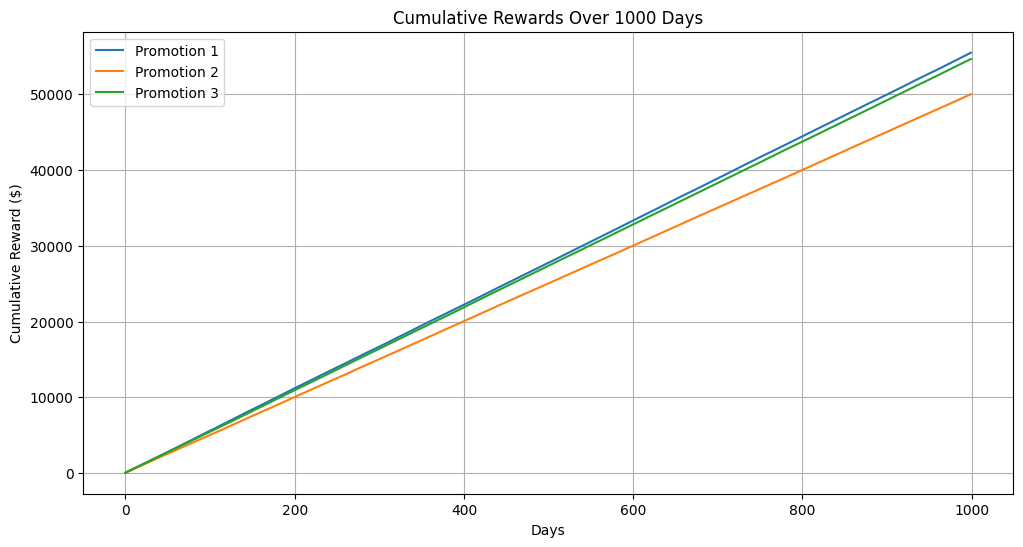


Future Reward Simulation Results
------------------------------------------------
Strategy Strategy_1 (Promotion 1):
- Average Daily Reward: $55.48
- Total Reward Over 10,000 Days: $55482.58
Strategy Strategy_2 (Promotion 2):
- Average Daily Reward: $50.00
- Total Reward Over 10,000 Days: $50004.51
Strategy Strategy_3 (Promotion 3):
- Average Daily Reward: $54.65
- Total Reward Over 10,000 Days: $54647.67


In [90]:
# Simulate future rewards for 1,000 days
num_days = 1000
future_rewards = {key: [] for key in data}  # Track rewards for each strategy

for day in range(num_days):
    for key in data:
        # Sample daily reward from the posterior distribution
        reward = np.random.normal(posterior[key]['mean'], posterior[key]['std'])
        future_rewards[key].append(reward)

# Calculate cumulative rewards
cumulative_rewards = {key: np.cumsum(future_rewards[key]) for key in future_rewards}

# Calculate average rewards over 1,000 days
average_rewards = {key: np.mean(future_rewards[key]) for key in future_rewards}

# Plot cumulative rewards
plt.figure(figsize=(12, 6))
for key in future_rewards:
    plt.plot(cumulative_rewards[key], label=f"{data[key]['name']}")

plt.xlabel("Days")
plt.ylabel("Cumulative Reward ($)")
plt.title("Cumulative Rewards Over 1000 Days")
plt.legend()
plt.grid(True)
plt.show()

# Print future reward statistics
print("\nFuture Reward Simulation Results")
print("------------------------------------------------")
for key in future_rewards:
    print(f"Strategy {key} ({data[key]['name']}):")
    print(f"- Average Daily Reward: ${average_rewards[key]:.2f}")
    print(f"- Total Reward Over 10,000 Days: ${cumulative_rewards[key][-1]:.2f}")
